<a href="https://colab.research.google.com/github/hrithik2105/GPT2-Style-LLM-from-scratch/blob/main/LLMsfromsctarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Creating LLMs*



# **Step 1: Tokenization**

a) Extract all the characters and store in raw_text (str format):

In [ ]:
with open ("/content/the-verdict.txt", "r", encoding = "utf-8") as f:
  raw_text = f.read()

print("Totat number of characters:",len(raw_text))
print(raw_text[:99])

Totat number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


b) Use Regex library to split the characters into tokens based on parameters like whitespaces(\s) and other special characters.

In [ ]:
import re
preprocessed  = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)

c) Use **.strip()** to remove white spaces in the list

In [ ]:
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30], "\n", len(preprocessed))

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in'] 
 4690


# **Step 2: Assigning Token IDs to the tokens**

a) Sort the 'preprocessed' **list** and store it in a **set** named 'vocab':

In [ ]:
vocab = sorted(set(preprocessed))
print(len(vocab))

1130


b) Use **enumarate()** function to assign a number (starting from 0) to all the tokens in vocab **set** and store it in vocab **dictionary**:

In [ ]:
vocab = {token:integer for integer, token in enumerate(vocab)}

c) Print first 25 tokens (with their ids) from the dictionary:

In [ ]:
for i, item in enumerate(vocab.items()):
  print(item)
  if (i>=25):
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)


d) Extending the vocab by adding <|unk|> (token used to denote any unknown token from the input) and <|endoftext|> (token used when one source/segment/topic is over). We do this by converting the preprocessed set back to list and then using the .extend() function to add the new items.

In [ ]:
preprocessed = sorted(list(set(preprocessed)))
preprocessed.extend(["<|unk|>","<|endoftext|>"])
vocab = {token:integer for integer, token in enumerate(preprocessed)}

In [ ]:
len(vocab.items())

1132

In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|unk|>', 1130)
('<|endoftext|>', 1131)


#Importing **tiktoken**

Tiktoken library is currently used by OpenAI which relies on **byte-pair encoding** which supports all the GPT models.

In [3]:
!pip3 install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.7 MB/s eta 0:00:00


# Implementing **BPE** and decoding

Byte-pair encoding is a sub word tokenization technique used by the LLM. Subword basically captures rootword, suffixes, repeated words and assigns a token value to them. Subwords are created based on the token frequency of characters. This makes the vocab shorter, computationally efficient and retain meanings of rootwords and suffixes. Eg: 'Boy','Boys' are fed into the LLM. Here, 'Boy' is assigned one token id and 's' is assigned another token id. The token ids can look like [3476, 3476, 56] for 'Boy','Boy' and 's'. This is called byte-pair encoding. Initially 'B' is merged with 'o' which gives 'Bo' (1 char should be merged with another. Hence byte-pair). Later, 'Bo' is merged with 'y' resulting in 'Boy' token. All the previous tokens relating to B, o and y are deleted. Only 'Boy' is kept as a single token along with the previous 's' token.


In [4]:
import importlib
import tiktoken
print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.9.0


We will extract the GPT-2 version from the tiktoken library into the tokerizer variable

In [5]:
tokenizer = tiktoken.get_encoding("gpt2")

The tiktoken library has **encode** (encodes token to token ids) and **decode** (decodes token ids to tokens) methods in it.

Using the tokenizer variable to access the encode method from the tiktoken library over a sample text.

In [ ]:
sample_text = ("Cristiano Ronaldo is the greatest ever football player in the world."
                "<|endoftext|> He has scored over 920 goals.")

tokenids = tokenizer.encode(sample_text, allowed_special={"<|endoftext|>"})
print(tokenids)

[34, 1585, 10115, 36309, 318, 262, 6000, 1683, 4346, 2137, 287, 262, 995, 13, 50256, 679, 468, 7781, 625, 47679, 4661, 13]


Note: We can also see the token id for <|endoftext|> token which is 50257 which is basically present in the end. So the vocab of GPT-2 consists of 50257 tokens. The total number of words in English language is around 170,000 - 200,000 words. So, this byte-pair encoding method efficiently and effectively reduced the vocab size retaining important rootwords and suffixes.

Inversely, implementing decode method to extract the the tokens back from the tokenids.

In [ ]:
tokens = tokenizer.decode(tokenids)
print(tokens)

Cristiano Ronaldo is the greatest ever football player in the world.<|endoftext|> He has scored over 920 goals.


# Sample implementation of **Input-Target** pairs using **Sliding** **Window** approach

In [ ]:
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))
print(enc_text[:20])

5145
[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438]


Sample creation of Input-Target pairs using the same verdict dataset but removing first 50 tokens.

In [ ]:
sample_enc = enc_text[50:]

We are going to use 2 vairables x (denoting the input tokens) and y (denoting the target tokens). Eg: Lets say X=[1,2,3,4] and Y=[2,3,4,5]. We want the first element in i/p token to match first value in the o/p token in 1st iteration. In the next iteration, we want to consider the 1st and the 2nd token from i/p and only 2nd token in the o/p (rest of the o/p values should be masked). Context size lets us choose how many tokens should be considered in each iteration.

In [ ]:
context_size = 4
x = sample_enc[:context_size] #sample_enc[0 to 4] basically 0,1,2,3
y = sample_enc[1:context_size + 1] #sample_enc[1 to 5] basically 1,2,3,4
print (f"input tokens:{x}")
print (f"target tokens:{y}")

input tokens:[290, 4920, 2241, 287]
target tokens:[4920, 2241, 287, 257]


This approach is called 'Sliding Window' approach which basically slides over the context_size in each iteration.

We can show it in step-by-step process to show the iterations.

In [ ]:
for i in range (1, context_size+1):
  context_input = sample_enc[:i] # Displays all the elements from sample_enc list till i (excluding i).
  desired = sample_enc[i] # Displays i whch is basically the output token.

  print(context_input, "------>", desired)

[290] ------> 4920
[290, 4920] ------> 2241
[290, 4920, 2241] ------> 287
[290, 4920, 2241, 287] ------> 257


Inversely, decoding in step-by-step process

In [ ]:
for i in range(1, context_size+1):
  context_input = sample_enc[:i]
  desired = sample_enc[i]

  print(tokenizer.decode(context_input), "------>", tokenizer.decode([desired]))

 and ------>  established
 and established ------>  himself
 and established himself ------>  in
 and established himself in ------>  a


# Multi-dimensional approach using **Dataset** and **Dataloader**

We can implement the same Input-Target pairs using Dataloader which uses Dataset from pytorch library(which basically works on the sliding window approach). We do this because we want to convert our tokenized ids (input) into multidimensional arrays or **Tensors**. This step is crucial before vector embeddings which takes in these **Tensors** as input.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
      self.input_ids = []
      self.target_ids = []

      token_ids = tokenizer.encode(txt, allowed_special={"<|endoftxt|>"}) #Tokenizing the entire input text

      # Using sliding window to chunk the overlapping sequences of max_length(=context size)
      # We iterate it over len(token_ids)-max_length to not exceed the available tokens which can lead to out of bounds error
      for i in range(0, len(token_ids) - max_length, stride):
        input_chunk = token_ids[i: i + max_length]    #From first tokenid till context_size
        target_chunk = token_ids[i + 1: i + max_length + 1] #From 2nd element till context_size+1

        self.input_ids.append(torch.tensor(input_chunk))
        self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):  #Returns the length of the input tensor
      return len(self.input_ids)

    def __getitem__(self, idx):   #Returns the i/p tensor(multi-dim array) and its corresponding o/p tensor(multi-dim array)
      return self.input_ids[idx], self.target_ids[idx]

Feeding the input Dataset to the Dataloader in batches

**batch_size** = How many sequences of tensors to consider at once which can run in parallel. Default = 4.

**max_length** = How many token ids in each row of tensor

**stride** = how many steps to take from one input tensor to process the next input tensor (step size). Taking too little stride results in more overlapping of tensors with very little change in each.

**drop_true** = **True** ensures all batches have equal number of sequences(rows of tensors). Incase if its uneven, it gets dropped to prevent any inconsistencies in training as the heavily depends on equal batch sizes. It's also helpful in padding to prevent any erros.

num_workers = number of parallel


Eg: Lets assume we have token_ids = [101, 2009, 2001, 1037, 3835, 2154, 102]

with max_length = 3 and stride = 1

In sequence 1, input tokens = [101, 2009, 2001] and the resulting target tokens = [2009, 2001, 1037]

In sequence 2, input tokens = [2009, 2001, 1037], target tokens = [2001, 1037, 3835]

In sequence 3 input tokens = [2001, 1037, 3835],
target tokens = [1037, 3835, 2154]

In sequence 4 input tokens = [1037, 3835, 2154],
target tokens = [3835, 2154, 102].

Here, giving batch_size = 4 means that the dataloder will process all 4 sequences(rows of tensor) in one iteration to produce the target tokens for all 4 sequences where one tensor is overlapping another.

In [6]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128,
                         shuffle=True, drop_last=True, num_workers=0):

  # Initialize tokerinzer
  tokenizer = tiktoken.get_encoding("gpt2")

  #Create dataset
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

  dataloader = DataLoader(dataset, batch_size=batch_size,
                          shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)

  return dataloader

Using the dataloader function to create and print a sample tensor using input from verdict.txt. The batches are going to be displayed depending on the batch size. 2 batch size = 2 rows with each row = max_length. The second batch depends on the stride.

In [ ]:
dataloader = create_dataloader_v1(raw_text, batch_size = 1, max_length=4, stride=2, shuffle=False)


data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


Printing second batch tensor. We use **iter** (to iterate over the batches one by one using the **next**)

In [ ]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[2885, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


We can vary strides, batch sizes and strides to produce tensors of varying length and step sizes. Normally, its better to keep max_length and stride as same number because that way the sequences (tensors)dont over lap after each iteration and complete tensors will be displayed without skipping any tokens.

In [ ]:
dataloader2 = create_dataloader_v1(raw_text, batch_size = 8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader2)

first_batch = next(data_iter)
second_batch = next(data_iter)

print("First Batch:",first_batch)
print("Second Batch:",second_batch)

First Batch: [tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]]), tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])]
Second Batch: [tensor([[  287,   262,  6001,   286],
        [  465, 13476,    11,   339],
        [  550,  5710,   465, 12036],
        [   11,  6405,   257,  5527],
        [27075,    11,   290,  4920],
        [ 2241,   287,   257,  4489],
        [   64,   319,   262, 34686],
        [41976,    13,   357, 10915]]), tensor([[  262,  6001,   286,   465],
        [13476,

#Creating Vector/Token Embedding Layer for the LLM

Creating lookup dictionary for the input token tensor. GPT-2 uses vocab size of 50257(each token id having dimension of 256), the overall dimension for our vector/token embeddings will be 50257x256

We use **torch.nn.Embedding()** to create vector/token embedding layer(matrix) which takes in vocab_size and output_dim as paramenters which is nothing but 50257x256

In [ ]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

Creating the main dataloader of verdict for the LLM training.

In [ ]:
max_length = 4
dataloader_verdict = create_dataloader_v1(raw_text, batch_size = 8, max_length=max_length,
                                          stride=max_length, shuffle=False)


Since the batch_size = 8, each batch will have tensor dimension of 8x4 (8=batch size=number of rows, 4=context_length=max_length=number of columns).

In [ ]:
data_iter = iter(dataloader_verdict)
inputs, targets = next(data_iter)
print("Token Ids: \n", inputs)
print("Shape:",inputs.shape)

Token Ids: 
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Shape: torch.Size([8, 4])


Using the embedding layer which was initially created to embed these 8x4 sized tensors. Here each of the token_ids will be matched to a vector embeding in a 256 dimensional space. Essentially, each tensor will have dimensions of 8x4x256 (3D tensor).

In [ ]:
vector_embeddings = token_embedding_layer(inputs)
print(vector_embeddings.shape)

torch.Size([8, 4, 256])


# Adding Positional Embeddings to the Vector Embeddings to create the input embeddings

Positional embeddings are important as tokens appearing at the starting of the input can have different semantic meaning or context compared to tokens appearing at the end of the input. We basically create pos_embeddings based on the size of each row of input (context_size=max_length) being processed. Here, we are mapping 4 token_ids in each row where each token id furter has 256 dimensions which is mapped to the vocab, so we create positional embedding layer of 4x256 dimension.
Essentially, we embed the same pos_embedding vector to all the vector embeddings depending on their positions in the matrix. So, 1st column vector embedding will always get added with 1st column pos_embedding. Similarly 2nd column vector_embedding will always get added with 2nd column pos_embedding and so on till 4th column.

In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


torch.arrange is used to create 1-D tensors from 0 till context_length-1. In our case context_length = 4[0,1,2,3] and each of them will have 256 dimensions. This is done using torch.arrange.

Creating the final **input_embeddings** by adding the **vector_embeddings** with **pos_embddings**

In [ ]:
input_embeddings = vector_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


#Causal Attention (single head) for a sample input tensor

We implement causal attention for a single head for a sample tensor input. This can be extended to a multi-head approach where computations are done in parallel.

Note: Causal attention is different compared to self attention as causal attention implements **not** conserving future tokens by intorducing masking to cover the upper triangular attention score matrices  while normal self atention needs access to the future tokens to actually cause an impact (atend to) on the previous tokens. Autoregressive models like GPT uses Causal attention while Bidirectional models like BERT uses self-attention

In [ ]:
import torch
sample_inputs = torch.tensor(
      [[0.43, 0.15, 0.89],    #Your
       [0.55, 0.87, 0.66],    #journey
       [0.57, 0.85, 0.64],    #starts
       [0.22, 0.58, 0.33],    #with
       [0.77, 0.25, 0.10],    #one
       [0.05, 0.80, 0.55]]    #step
)

After creating sample tensor input of dimension 6x3 ( each row corresponds to the input vector embedding of tokens "Your", "journey", "starts", "with", "one","step". Each column corresponds to the the dimensional space at which they are embedded in. We can see, here to make things easier, they are represented in 3dimensional vector space.) Note: GPTs and other models are generally embedding in higher space(12000+ for GPT3) and also have more context length (more rows).

Before starting the attention mechanism, we kind of assume that the input vector embedding have somehow encoded the meaning of the words given to them.

The main goal of the attention is to give **RICHER** context to the input embeddings.

Attention Pattern (Attention scores) are generated by considering the 3 weighted matrices (Query, Key, Value). As usual these matrices are initialized with random weights as the model learns to adjust them accordingly during training and back propagation.

**Goal of Query matrix**: Think of query vector like asking question to all the vecotrs in the vector subspace.

**Goal of Key matrix**: Think of key matrices like answering to the query by revealing its location in the vector space.

**Goal of Value matrix**: To navigate/move the query-key vectors to create a context_vector which has the required richer relationship considering all the input tokens.

To make the model easily scalable, we'll create a batch (by stacking the input on top of the same input of same values). This batch is then passed as a parameter to the causal attention function.

In [ ]:
batch = torch.stack((sample_inputs, sample_inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


2 represents the number of stacks, 6 represents the context_length dimension (number of tokens considered at once to calculate the attention pattern/score). 3 represents each token dimension in the vector space.

In [ ]:
import torch.nn as nn

class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1))


    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec

**Step 1**: Create weighted matrices for query, key and value with the dimenions **d_in X d_out** (d_in should be equal to the dimension of each token = 3 in the case we're gonna define below, d_out can be any value and it represents the overall output dimension of context_vec. we have taken d_out = 2 in sample case defined below). These matrices can be created using torch.nn.Linear() which follows the formula y = x.A**T + b and also taking in the parameters equal to the d_in and d_out. Also, by default bias gets added the weighted matrices, to remove the bias, set bias = False)

**Step 2:** Inside **forward** function, the W_key, W_query and W_value matrices all get multiplied with the sample_input tensor, producing, 'keys', 'queries' and 'values' matrices respectively. Note: They have the shape(dimensions) of **b** (batch_size) x **num_tokens** (context_length) x **d_in** (each input token dimension). In our sample_input, we started out with 2x6x3 dimensions where each of the tensor has dimensions of 6x3. Now this 6x3 matrix gets multiplied with 3x2 (initially weighed key, query and value matrices) seperately to produce 6x2 dimensional keys, queries and values matrices sepertely. When stacked, they have the dimension 2x6x2 which denotes batch_size, num_tokens and d_in. Now we dont need the input tensors anymore as their information lies within these 3 matrices.

**Step 3**: Attention score/Attention pattern is generated by taking the dot-product (@) between queries and keys transpose. Note: Since queries, keys and values matrices have the input dimensions: batch_size x num_tokens x d_in (2 x 6 x 2), considering only the 2nd and the 3rd dimensions which is (1,2) which is basically num_tokens x d_in from the list gives queries(6 x 2) and keys transpose(2 x 6). So the resultant attn_score is now having the dimensions(6 x 6)

**Step 4:** We use *register_buffer()* to create a matrix (mask) full of ones in the upper traingle and zeros in the lower triangle. Diagonal = 1 implies that we shift our diagonal by 1 unit up. This matrix will later used to mask the attn_score matrix to produce attn_weight matrix.

**Step 5:** We replace 1s (bool) in the mask matrix with -inf and then we will mask it with the attn_scores matrix to create attn_weights matrix. For this *masked_fill_()* fucntion from pytorch is used.

Note: [:num_token, :num_token] is given as a range to iterate over the entire mask matrix. We can edit this range for customized masking where we can select the rows and columns to mask.

**Step 6:** We apply **softmax** function to **normalize** the **attn_weight** matrix row by row so that all weights now lie in the range 0 to 1 (includes both 0 and 1). Also, the sum of all weights in each row should be 1. -inf turns to 0 as there is an exponent in the softmax function. (Softmax = (e**x1 - max_weight of that row) divided by the sum of the row currently). Also, the attn_score gets divided by the sqrt(keys matrix 2nd dimension)

**Step 7:** Implementation of dropouts using the **torch.nn.dropout()** function to make sure all neurons are active and none of them become inactive. This is done by dropping out specified percentages of the attn_weight. After dropping out, the function automatically scaled the remaining weights by the amount dropped in order to maintain the total sum of activations of neurons which is constant. Note: weights will get randomly dropped but the probability(percentage) is maintained across the entire attn_weight matrix and not across each row.

Step 8: We finally multiply the attn_weight matrix (6x6) with the values matrix (6x2) which produces the final context_vec matrix having dimensions (6x2). 2 batches of these will be generated. Each of 1st dimension is corresponding to the input tokens.
This means each row of the contex_vec matrix will correspond to a vector with 2 dimensions. So we get 6 context vectors for 6 tokens with each of them having enriched meanings and relationships. Also the later tokens aren't affecting the earlier tokens in this mechanism.

Using Causal Attention by creating an instance:

In [ ]:
torch.manual_seed(123)
d_in = sample_inputs.shape[1]
d_out = 2
context_length = batch.shape[1]
causal_attn = CausalAttention(d_in, d_out , context_length, 0.0)
context_vec = causal_attn(batch)
print(context_vec)
print("\n",context_vec.shape)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)

 torch.Size([2, 6, 2])


# Multi-Head attention with weight splits

In [7]:
import torch.nn as nn

class MultiHeadAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
    super().__init__()
    assert (d_out % num_heads == 0), \
    " d_out must be divisible by num_heads"

    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out // num_heads #Reducing the proj dimension to match the output dim
    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_keys = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_values = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.dropout = nn.Dropout()
    # Mask layer consisting of an upper triangluar matrix (lower part = 0, upper part= 1, diagonal = 1 by default).
    # putting digonal = 1 in the parameter, shifts the diagonal up by 1 unit. so diagonals will be filled with 0.
    self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1))
    self.out_proj = nn.Linear(d_out, d_out) #Linear layer to combine output heads

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    queries = self.W_query(x)
    keys = self.W_keys(x)
    values = self.W_values(x)

# Changing the dimensions of keys, queries and values matrices by unrolling/replacing the d_out with num_head,head_dim
# Basically we are converting the 3dim tensor to a 4dim tensor

    queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
    keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
    values = values.view(b, num_tokens, self.num_heads, self.head_dim)

# Now we will group by num_heads instead of num_tokens. For this we need to
# switch (b, num_tokens, num_heads, head_dim) with (b, num_heads, num_tokens, head_dim).
# This is done by taking the transpose between 1 and 2 positions.
    queries = queries.transpose(1, 2)
    keys = keys.transpose(1, 2)
    values = values.transpose(1, 2)

#Computing attn_scores by taking dot product queries and keys.transpose. We will consider switching num_tokens and head_dim
# queries (b, num_heads, num_tokens, head_dim) will be multiplied with keys transpose (b, num_heads, head_dim, num_tokens).
# So the resulting attn_scores dim will be (b, num_heads, num_tokens, num_tokens).
# Therefore, for each head, the rows and columns will be num_tokens and num_tokens effectively generating the attention pattern.
    attn_scores = queries @ keys.transpose(2, 3)

# Implementing a mask layer to prevent the future tokens from affecting the previous tokens.
# mask.bool() returns all 1's, so we will replace them with -inf and add that to the attn_scores matrix.
    mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
    attn_scores.masked_fill_(mask_bool, -torch.inf)

# computing attn_weights by dividing attn_scores by the head_dim which is at -1 pos in (b, num_heads, num_tokens, head_dim).
# dim = -1 is given to make sure each rows (and not cols) sum up to 1.
# Normalizing using softmax() which replaces -inf with 0 and also makes sure
# all rows add up to 1 with each value between 0 and 1. So even -ve values will be replaced with a +ve one.
# The resulting normalized and masked attn_weights dim remains unchanged (b, num_heads, num_tokens, num_tokens)
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
    attn_weights = self.dropout(attn_weights)

# Computing updated attn_weights matrix by
# multiplying attn_weights(b, num_heads, num_tokens, num_tokens) with values (b, num_tokens, num_heads, head_dim) matrix.
# Resultant matrix will have dim (b, num_heads, num_tokens, head_dim)
# We need to swap back num_tokens and num_heads because the final resultant context_vec matrix will have
# dim as (b, num_tokens, d_out) where d_out = (num_heads, head_dim)
    context_vec = (attn_weights @ values).transpose(1, 2)
# contiguous() merges num_heads and head_dim
    context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
# combining the output heads
    context_vec = self.out_proj(context_vec)

    return context_vec

Implementing MHA using a sample tensor as input.

In [ ]:
torch.manual_seed(123)
inputs = torch.tensor(
        [[0.43, 0.15, 0.89, 0.55, 0.23, 0.32],    # Row 1 token
         [0.64, 0.98, 0.54, 0.23, 0.54, -0.56],   # Row 2 token
         [0.43, 0.15, 0.89, 0.55, 0.87, 0.66]]    # Row 3 token
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vec = mha(batch)
print(context_vec)
print(context_vec.shape)

torch.Size([2, 3, 6])
tensor([[[-0.0152, -0.1093, -0.2054,  0.0487, -0.4244, -0.3690],
         [ 0.1787, -0.0857,  0.1942, -0.1442, -0.2542, -0.4416],
         [ 0.1650, -0.0203,  0.2202, -0.0756, -0.3357, -0.3732]],

        [[ 0.1716, -0.0724,  0.0353, -0.0056, -0.2458, -0.2790],
         [ 0.0618, -0.1808, -0.2494,  0.0312, -0.3029, -0.3069],
         [ 0.1300, -0.1126, -0.0586,  0.0230, -0.3148, -0.2657]]],
       grad_fn=<ViewBackward0>)
torch.Size([2, 3, 6])


This basically gives us multiple contexts (or many different meanings) to the tokens thus making them closer to many other tokens in the vector space. Example: Give just "Tower", the model will assume that the tower is a 'large', 'tall', 'steel' structure and tries to give the vector embeddings which are close to 'tall', 'large' and 'steel'. If we just change the input to "Eiffel Tower", now the vector will slightly point more towards Paris, France along with the previous embeddings it had with large, tall and steel. If I again change the input to "Miniature Eiffel Tower", then the model no longer points towards large, tall and steel. So this change in vector embeddings are done by the Value Matrices mulitplication which basically steers the vectors by providing direction using which it can scale up or down the dimension subspace and then point in the updated direction. There are 2 kinds of value matrices, value up and value down. Value up matrices puts the vector to a higher dimensional space and are generally stiched together to form a single matrix in transformers usually. Value down matrices are usually referred to as output matrix which basically brings down the vector from higher dimensional to lower dimensional space.

# Layer Normalization, GELU and FeedForward

Layer Normalization: We do layer normalization on 3 seperate occasions in the GPT architecture (2 times  inside the Transformer block). First time usage is after receiving the input vector embeddings (input encoding from the lookup consisting of 50257 tokens + positional encodings) but before the Masked Multi-Head Attention. Second time is before the Feed Forward layer. Third time is out of the transformer block which we will implement later. Goal of normalization is to make the mean across the vector embeddings of every token to be 0 and variance to be 1. By doing this we can keep the gradient stable and the learnig process is at a good rate. It also prevents the internal covariate shift which basically changes the input distributions for all layers in the feed forward neural network. The normalization is done by taking the input vectors (dim = 768) for each token and for each vector dimension(weight) subtracting the mean across the columns of that particular row (for each input token basically) with the weight and dividing the difference by the square root of variance of that particular token (across the col). (Variance is calculated by taking the weighted sums of squared difference between each weight(vector) and the mean across that col and dividing it over the total vector dimensions.)

In [8]:
GPT2_CONFIG_124MP = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_layers": 12,
    "n_heads": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim = True)
    var = x.var(dim=-1, keepdim = True, unbiased = False)
    norm_x = x - mean / torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift

GELU (Gaussian Error Linear Unit): This function basically smoothens the outputs of the each Linear Layer (neural network with hidden weights). This step is done every time after getting the outputs from the Linear Layer. This is a non-linear fucntion which solves the **dead neuron** problem (learning doesn't get hindered)  and **differentiability** of the output vectors of values a little less than 0 (as they dont automatically get changed to 0 like in RELU).

In [9]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

Alternatively, we can use the inbuilt torch.nn.GELU(x) function from pytorch library which uses the same underlying formula.

Feed Forward Layer (Linear Layer): This layer basically projects the tokens each having 768 dimensional vectors into a higher dimensional space (4 times higher) to make sure the vectors absorb richer context between the tokens and then contracted back into 768 dimensional vectors. We make sure to apply GELU after the expansion (before the contraction).

In [10]:
class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
    )

  def forward(self, x):
    return self.layers(x)

# Designing and instantiating the final Transformer block (including shortcut connections)

Shortcut connections are added to solve the** vanishing gradient problem** (after each iteration of backpropagation, the gradient gets reduced to such extent that the learning becomes stagnant as the model assumes no difference in the gradient). To solve this, we add the previous input layer to the output layer **after the dropouts** in the Multihead attention and Feed forward mechanisms.

In [11]:
class TransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.attn = MultiHeadAttention(
        d_in = cfg["emb_dim"],
        d_out = cfg["emb_dim"],
        context_length = cfg["context_length"],
        num_heads = cfg["n_heads"],
        dropout = cfg["drop_rate"],
        qkv_bias= cfg["qkv_bias"])
    self.ff = FeedForward(cfg)
    self.norm1 = LayerNorm(cfg["emb_dim"])
    self.norm2 = LayerNorm(cfg["emb_dim"])
    self.drop_shortcut = nn.Dropout(cfg["drop_rate"])


  def forward(self, x):
    # Shortcut connection for the attention block
    shortcut = x
    x = self.norm1(x)
    x = self.attn(x)
    x = self.drop_shortcut(x)
    x = shortcut + x

    # Shortcut connection for the feedforward block
    shortcut = x
    x = self.norm2(x)
    x = self.ff(x)
    x = self.drop_shortcut(x)
    x = shortcut + x

    return x

In [ ]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #(batch, tokens, dimensions)
block = TransformerBlock(GPT2_CONFIG_124MP)
output = block(x)
print("Input Tensor shape: ", x.shape)
print("Output Tensor shape: ", output.shape)

Input Tensor shape:  torch.Size([2, 4, 768])
Output Tensor shape:  torch.Size([2, 4, 768])


As we can observe that the dimensions are **consistent** which is the main thing in Transformer. This is super useful so as to easily stack the tensors one on top of another without worrying too much about the dimensions. It also allows for the computation of matrix multiplications in the attention mechanism( Consider 2 matrices p x q and r x s. Here, matrix multiplication is possible only if q=r and the resultant matrix dimension would be p x s).

# Building/Connecting the entire 124M parametric model.

In [12]:
class GPTModel(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"]) # Initializing tok_emb
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"]) # Initializing pos_emb
    self.drop_emb = nn.Dropout(cfg["drop_rate"]) # Initializing drop out rate (drop_emb)

    self.trf_blocks = nn.Sequential(* [TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
    # Chain the transformer and stack the tensors till n_layers (12 in GPT2 as defined in the dict)

    self.final_norm = LayerNorm(cfg["emb_dim"]) # Initializing Final normalization layer

    self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias = False)
    # Initializing the final output layer containing logits.
    # Input dim of tokens = 768(emb_dim) x N(num_tokens).
    # Dim of the output linear layer = N(num_tokens) x 50257(vocab_size).
    # Output dim of Logits = n_batches x 768(emb_dim) x 50257(vocab_size).

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape # To define the shape(dimensions) of entire token_ids (in_idx)
    tok_embeds = self.tok_emb(in_idx)  # To create token embeddings for all the token_ids (in_idx)
    pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device)) # To create pos_emb only till seq_len and start=0 is assumed
    x = tok_embeds + pos_embeds # Combining both tok_emb and pos_emb to form the input embeddings
    x = self.drop_emb(x) # Performing dropout
    x = self.trf_blocks(x) # Going inside the transformers
    x = self.final_norm(x) # Performing the final normalization
    logits = self.out_head(x) # Passing the normalized values through linear layer to produce logits

    return logits

Logits contain the likelihood (probability but not exactly) of all tokens from the vocab_size. Our job is to select the highest valued logits which will be essentially be the next token. To do this, its best practice to pass these logits into a non-linear function (softmax preferably) which gives the probabilities for all tokens to be the next token.

In [ ]:
torch.manual_seed(123)
batch = torch.randint(0, 50257, (2, 4)) # random token_ids from the vocab (50257) and creating a tensor of size 2(batch_size) x 4(seq_len)
model = GPTModel(GPT2_CONFIG_124MP)
out = model(batch)
print("Input Batch:\n", batch)
print("\n Output shape:", out.shape)
print(out)

Input Batch:
 tensor([[15742, 11036, 24681,  8041],
        [37378,  3791, 20331, 32351]])

 Output shape: torch.Size([2, 4, 50257])
tensor([[[ 1.7085, -2.6334, -4.3429,  ...,  6.2408, -9.0471, -1.1634],
         [ 6.4276,  0.9763, -1.3143,  ...,  2.1716,  2.4320, -2.2929],
         [ 1.0077,  0.7788, -3.4075,  ..., -3.7775, -1.4718, -0.9255],
         [ 3.7655, -2.8953,  0.1282,  ...,  5.6484,  1.0812,  0.8284]],

        [[ 1.5700,  2.3426, -1.7597,  ..., -1.2794,  4.5621,  3.7844],
         [ 1.5247, -2.1226, -8.3479,  ...,  2.2575,  0.3201,  2.4592],
         [-0.4322,  8.3325, -4.1975,  ...,  1.2495, -5.7797, -1.5484],
         [ 4.8320,  7.4809, -0.1386,  ..., -1.5529, -4.8710, -1.5130]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 162419712


We can observe that our model has 162M parameters which is more than 124M GPT2 model. This is because the GPT2 model does something called **Weight Tying** which is basically reusing the weights of one layer (Token embedding layer) as another layer (Linear output layer) where both layers have the dimensions 50257 x 768.

GPT does this to reduce the **model size** and **computational complexity**.

However, for training the weights/parameters, its better to have more parameters and not resuse any weights as it can capture more complex relationships which increses the model's learning rate and makes them better.

# Generating text from Output Tokens

We build a function which generates tokens by taking in model(GPTModel), idx(basically input having dimension as: batch x n_tokens), max_new_tokens(how many new tokens to generate), context_size (how many tokens to look at/ consider while predicting the next token).

In [13]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
  for _ in range(max_new_tokens):

    idx_cond = idx[:, -context_size:]
    # Consider example where idx = [[1, 2, 3, 4 ,5, 6, 7, 8],[9, 10, 11, 12, 13, 14]].
    # If we give context_size as 5 (lets say) which means the LLM can only look at 5 token_ids at once from each batch to make the prediction.
    # So, we only consider the last 5 token_ids from each batch. Thats why the -context_size.
    # Therefore, the token_ids [[4, 5, 6, 7, 8], [10, 11, 12, 13, 14]]
    # which are basically the last 5 token_ids in their respective batches that are to be considered.

    with torch.no_grad():
      logits = model(idx_cond)  # To get the output logits which has the dim (batch, n_tokens, vocab_size)

    logits = logits[:, -1, :]
    # Only the last output logit vector is to be considered. So we dont have to look at all tokens.
    # Hence, dimensions of logits will also get changed from (batch, n_tokens, vocab_size) -> (batch, vocab_size)

    probas = torch.softmax(logits, dim=1)
    # Applying softmax to obtain probabilities of becoming the next token for all tokens in the vocab_size.
    # Dimensions after softmax will still be (batch, vocab_size).


    idx_next = torch.argmax(probas, dim=1, keepdim=True)
    # To get the token_id of the largest probability value from the vocab_entry.

    idx = torch.cat((idx, idx_next), dim=1)
    # Append to the newly found token_id to the running sequence. Dim = (batch, n_tokens+1)

  return idx

Although, we could have just implemented the torch.argmax() function directly to find the largest probability value, implementing softmax() is crucial if we want to introduce Temperature Scaling which basically induces creativity in the model by not selecting high probalility value all the time but to mix and match at times.

In [ ]:
start_context = "Football is played between"
encoded = tokenizer.encode(start_context)
print("Encoded Token IDs:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #Unsqueeze adds a singleton dimension at index = 0
print("\n Encoded Tensor Shape:", encoded_tensor.shape)

Encoded Token IDs: [37316, 318, 2826, 1022]

 Encoded Tensor Shape: torch.Size([1, 4])


We will use model.eval() to disable components like dropout since we are not training the model at the moment.

In [ ]:
model.eval()
out = generate_text_simple(
      model = model,
      idx = encoded_tensor,
      max_new_tokens = 6,
      context_size = GPT2_CONFIG_124MP["context_length"]
)

print("Output:", out)
print("\n Output Length:", len(out[0]))

Output: tensor([[37316,   318,  2826,  1022,  4633, 11462, 38946, 45935, 12298, 19812]])

 Output Length: 10


As we can see upon giving just 4 input tokens, the model was able to generate 6 more (total 10) token ids by undergoing all the mentioned steps. Now, we will decode to see if the newly generated token_ids make sense.

In [ ]:
decode_text = tokenizer.decode(out.squeeze(0).tolist()) # Squeeze removes a singleton dimension at index = 0
print(decode_text)

Football is played between negative guaranteed Barbarian delusionalAW fictional


As we can see, the model produced gibberish output tokens because we haven't **TRAINED** the model yet.

# Calculating **Loss function**

We load our verdict.txt dataset

In [14]:
import os
import urllib.request

file_path = "/content/the-verdict.txt"
# url = " "  We can also mention the URL inside the quotes to access the dataset

# if not os.path.exists(file_path):
#     with url.lib.request.urlopen(url) as response:
#         text_data = response.read().decode('utf-8')
#     with open(file_path, "w", encoding="utf-8") as file:
#         file.write(text_data)
# else:
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [64]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Total Characters: ", total_characters)
print("Total Tokens: ", total_tokens)

Total Characters:  20479
Total Tokens:  5145


Spliting the tokens for **training** (90%) and **validation** (10%)

In [65]:
train_ratio = 0.9
split_idx = int (train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

Using dataloaders to handle multiple batches efficiently as it can automatically divide the dataset into multiple batches making training easy to iterate.
Also, context_size here is 256 compared to 1024 in GPT2. This is done so that we can generate the tokens quickly as its computationally friendly. We've also limited batch_size to 2 for the same reason.

In [66]:
import torch
torch.manual_seed(123)

train_loader = create_dataloader_v1(
              train_data, batch_size = 2, max_length = GPT2_CONFIG_124MP["context_length"],
              stride = GPT2_CONFIG_124MP["context_length"], drop_last= True, shuffle=True, num_workers = 0)


val_loader = create_dataloader_v1(
              val_data,  batch_size = 2, max_length = GPT2_CONFIG_124MP["context_length"],
              stride = GPT2_CONFIG_124MP["context_length"], drop_last= True, shuffle=True, num_workers = 0)

Sanity checks to cover the edge cases where the
number of training tokens and validation tokens are **LESSER** than the context length.

In [67]:
# For training tokens
if (total_tokens * train_ratio < GPT2_CONFIG_124MP["context_length"]):
  print("Not enough tokens for the train_loader.Try to lower the context_length or increase the train_ratio")

# For validation tokens
if(total_tokens * (1 - train_ratio) < GPT2_CONFIG_124MP["context_length"]):
  print("Not enough tokens for the val_loader.Try to lower the context_length or decrease the train_ratio")

In [68]:
print("Train Loader:")
for x, y in train_loader:
  print(x.shape, y.shape)

print("\n Validation Loader:")
for x, y in val_loader:
  print(x.shape, y.shape)

Train Loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

 Validation Loader:
torch.Size([2, 256]) torch.Size([2, 256])


As we can we the data is split in 90-10 format (9 training batches and 1 validation batch). Here 2 represents batch_size. So, each batch of training and validation is computing 2 rows of 256 input tokens each.
Example: Lets assume in this example, the context_length = 4, stride = 4 and batch_size = 2.
So, input_tokens =
[[234, 4558, 4589, 7897], [7272, 9375, 12345, 45678]]
and
target_tokens = [[4558, 4589, 7897, 38898], [9375, 12345, 45678, 5381]]
Here, target_tokens represent the correct desired output token that we want the model to get. But since it's not trained yet, it wont produce the desired output. Also, for each batch(row) in input_token there are 4 steps going on. For the first input token [234], the desired target_tokens is at the first index in the target_tokens [4558]. In 2nd iteration for the same batch, first two input tokens get considered [234, 4558] and the target_tokenz value will be in the second index [4589]. Lastly, during 4th iteration, while finising the first batch, the input_tokens will have considered the first 4 tokens [234, 4558, 4589, 7897] and the target_tokens will have [38898] which is what we want the model to generate.

In [15]:
torch.manual_seed(123)
model = GPTModel(GPT2_CONFIG_124MP) #model instance
model.eval(); # To disable dropouts

The transformer basically takes in the input_tokens to produce logits. These logits have dimensions [2(batch_size), 256(context_size), 50257(vocab_size)]. However, we need to flatten these logits dim from 3D to 2D. So, we use logits.flatten(0,1) to flatten them across 1st and 2nd dim. Hence, the resultant dim of the logits will be [(512(tokens) x 50257(vocab_size))]. We should also do the same flattening for the target_tokens too.

Next, we need to calculate the loss function which is conventionally done by taking the (512 x 50257) logits and passing it through a softmax activation function which basically finds the highest token probabilaties across columns(vocab_size) for each row(input_token). Without training, these probabilities wont match with the right target_tokens. To solve this problem, we need to take the target_tokens ids and look up their probabilities respectively in the vocab_size. By doing that we will get another set of probabilities [p11, p12, p13, p14....p1256, p21, p22...p2256]. These values represent probabilities that the corresponding target_tokens appear after each input_token iteration. If the model is trained well, then each of the probability values will be closer to 1. Since that is not the case, the values are not closer to 1. To actually calculate the cross-entropy loss, we need to compute:
 -( log likelihood or average of sum of log of probabilities of the target_tokens for each batch).  
 Eg: For batch 1, the loss would be -(logp11 + logp12 + ... logp1256) / 256.
 Similarly for batch 2, the loss would be -(logp21 + logp22 + ....logp2256) / 256.
 Finally, we ADD both batch loss to calculate the overall cross-entropy loss.
 Note: We take negative log likelihood instead of positive because we need to find the local minima and would want our loss to minimize after each iteration. If we take postive log likelihood then we would need to maximize our loss to find the best model. Hence we take -log likelihoood.

 Instead of doing all above procedures, pytorch lib has a special function torch.nn.functional.cross_entropy() which takes in the flattened logits (prodced by the transformer) and the target_tokens as its parameters and returns the loss, while undergoing all the above steps(softmax + negative log likelihood) within the function itself.

In [16]:
def calc_loss_batch(input_batch, target_batch, model, device):
  input_batch, target_batch = input_batch.to(device), target_batch.to(device)
  logits = model(input_batch)
  loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
  return loss

# To calcualate loss for all batches,
# we implement another function which takes in whole data_loader containing multiple batches.

def calc_loss_loader(data_loader, model, device, num_batches = None):
  total_loss = 0.
  if len(data_loader) == 0:    # If the dataloader contains nothing
    return float("nan")
  elif num_batches is None:    # If num_batches is not explicitly given as an argument, then the dataloader considers len(dataloader) which are the previously split batches (9 for training and 1 for validation)
    num_batches = len(data_loader)
  else:   # If num_batches > len(dataloader), then it takes the minimum value between them in order to reduce the num_batches
    num_batches = min(num_batches, len(data_loader))

  for i, (input_batch, target_batch) in enumerate(data_loader):
    if i < num_batches:
      loss = calc_loss_batch(input_batch, target_batch, model, device) # Calculate loss for every batch
      total_loss += loss.item() # Add those loss and store it in total_loss variable.
                                # .item() is used to convert single element tensor into a scalar type like float or int
                                # so, that we can compute mean loss across all batches

    else:
      break

  return total_loss / num_batches # Returning the average/mean loss across all batches

In [69]:
device = torch.device("cpu") # Using device setting we can ensure that the data is loaded onto the same device as LLM model
model.to(device)

torch.manual_seed(123)

with torch.no_grad(): # Because we haven't started training yet, so we can disable gradient tracking
  train_loss = calc_loss_loader(train_loader, model, device)
  val_loss = calc_loss_loader(val_loader, model, device)

print("Training Loss: ",train_loss)
print("Validation Loss: ",val_loss)

Training Loss:  0.4904715220133464
Validation Loss:  7.583980083465576


We find both training and validation loss to be 11.47. These are the values that should be minimized using backpropagation which updates the weights thus increasing model's accuracy and thereby decreasing overall cost function.

# Backpropagation and Adam optimizer

We use loss.backward() function which directly computes the loss gradients(Cost function) which is basically change in loss function W.R.T all the weights. Our goal is to update weights by reducing the cost function. Simple formula for this weights update can be W = W + α. ∂Co/∂W

Lets assume, we have one output neuron with activation a(L) which is connected to a previous neuron with activation a(L-1) via the weights w(L).
Now, we want the output neuron to have a desired value of y = 1 but that is generally not the case before training. So, we can calculate the cost function, Co = (a(L) - y)^2

Also, a(L) = w(L)*a(L-1) + b(L)
Here, computing ∂Co/∂W involves implementing chain rule which basically takes the partial derivative of current cost function wrt previous weights:
∂Co/∂W = (∂(a(L))/∂W) * (∂Co/∂(a(L)))

Finally, after computing the cost function (gradients) wrt all weights, we update the weights using optimizers like Adam and Stochastic Gradient.
Adam is better than Stochastic Gradient as we dont need to update the learning rate manually each time we get the cost function. Adam does it automatically.
However, for deep learning models, even Adam optimizer performs the L2 regularization incorrectly(A.K.A weight decay which basically penalizes large weights by adding a loss term to the cost function) and this leads to overfitting in deep learning models.
So, models like BERT and GPT use **AdamW** which basically does the weight decay and arrives at the convergence in the loss landscape very quickly within a few number of steps by also preventing overfitting or overshooting of data.

# Final Training Loop implementation using all of the classes, functions and methodologies used earlier.

We can finally create a holistic training loop which uses all the above functions to pre-train the LLM

In [ ]:
! pip3 install tiktoken
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))
tokenizer = tiktoken.get_encoding("gpt2")

tiktoken version: 0.9.0


In [17]:
def text_to_token_ids(text, tokenizer):   #Uses tokenizer to encode text to tokens
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):   #Uses tokenizer to decode tokenids back to text
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

In [18]:
GPT2_CONFIG_124MP = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_layers": 12,
    "n_heads": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [19]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [20]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [21]:
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [62]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), ## Expansion
            GELU(), ## Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), ## Contraction
        )

    def forward(self, x):
        return self.layers(x)

In [70]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        # 2*4*768
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x
        # 2*4*768

In [22]:
import torch
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

torch.manual_seed(123)
model = GPTModel(GPT2_CONFIG_124MP)
model.eval();  # Disable dropout during inference

In [23]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context

    ###Input batch eg:
 ###tensor([[6109, 3626, 6100,  345],
        ##[6109, 1110, 6622,  257]])

    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond) ### batch, n_tokens, vocab_size

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In [24]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT2_CONFIG_124MP["context_length"],
    stride=GPT2_CONFIG_124MP["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT2_CONFIG_124MP["context_length"],
    stride=GPT2_CONFIG_124MP["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [25]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [26]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 4608
Validation tokens: 512
All tokens: 5120


We consider and calculate cross entropy loss instead of normal loss because cross entropy loss takes the negative average of log of probabilities (which has wider range and transform small probabilities into large negative values, making it easier for the optimizer to distinguish between wrong and right predictions). This is better than just calculating loss over raw probabilities (which are bound from 0 to 1 and the gradients would be small and as a result, slow down learning.).

However, instead of using the whole holistic process above, we can us a pytorch function torch.nn.fucntional.cross_entropy() to calculate cross entroy loss for both training and validation batches of tensors.

In [27]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [28]:
import torch

# Select device (Ensure compatibility with Google Colab, Apple MPS, or CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use CUDA if available
elif torch.backends.mps.is_available():
    device = torch.device("mps")  # Use Apple Metal Performance Shader (for Apple Silicon)
else:
    device = torch.device("cpu")  # Default to CPU

print(f"Using {device} device.")

# Move the model to the selected device
model.to(device)  # No assignment needed

# Set manual seed for reproducibility
torch.manual_seed(123)

# Ensure loss computation is done on the same device
with torch.no_grad():  # Disable gradient tracking for efficiency
    train_loss = calc_loss_loader(train_loader, model, device)  # Ensure train_loader is on the correct device
    val_loss = calc_loss_loader(val_loader, model, device)  # Ensure val_loader is on the correct device

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Using cuda device.
Training loss: 11.47785112592909
Validation loss: 11.477570533752441


In [29]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)

            loss.backward() # Calculates loss gradients using backproparation. MOST IMPORTANT step in order to update weights.

            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [30]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter): # Function to return train_loss and val_loss
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [31]:
def generate_and_print_sample(model, tokenizer, device, start_context): #Function which prints the output after each epoch
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

Creating an instance to run our pre-trained LLM loop.

In [32]:
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT2_CONFIG_124MP)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 51.396, Val loss 49.269
Ep 1 (Step 000005): Train loss 11.200, Val loss 11.886
Every effort moves you of the � his of the his of the his of the of the his of the his the his of the the of the his the of the the his of the his of the Zone the his of the of the . . . . . . .
Ep 2 (Step 000010): Train loss 13.548, Val loss 14.670
Ep 2 (Step 000015): Train loss 7.698, Val loss 8.921
Every effort moves you my about my my and my my my my not can my my my my not not not at my's for the of my for him, and I was not at my and at my my and's and my my myed at my not to have
Ep 3 (Step 000020): Train loss 6.421, Val loss 7.992
Ep 3 (Step 000025): Train loss 7.349, Val loss 9.388
Every effort moves you "as: "as: " had been, but " had have!! "as " " " "as! "as! ", when, youas! you, had have! " " "as: " " " had! The
Ep 4 (Step 000030): Train loss 4.937, Val loss 7.540
Ep 4 (Step 000035): Train loss 5.597, Val loss 8.226
Every effort moves you; and into a have was his g

We can see from the above text that the loss is getting minimized which is good. But the generated words still dont fit the context as it's trained using only one file having around 50000 tokens. We can also see that the model is straight up copying(memorizing) from the txt.file. This is the clssic case of overfitting. Finally, we can see that the validation loss after 2nd epoch is almost constant with very little change compared to the training loss which is going down after every epoch. This is again an example of overfitting and that the model is capable of only learning the specific patterns(training) only and not generalizable patterns (validation). So, even though our training loss is very less, doesn't mean the model is capable of recognizing new patterns which it hasn't seen before.

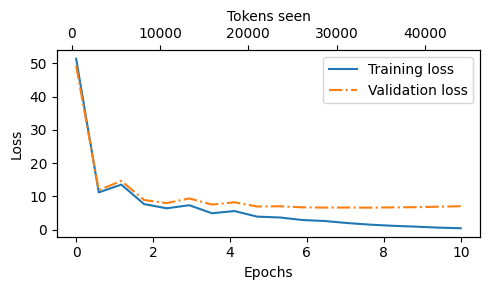

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

# Decoding strategies (temperature scaling and k-sampling)


**Temperature Scaling**:
In order for the model to perform better, we introduce temperature scaling which is basically a constant value (T>0) that's added into to the softmax function and this value divides all the output logits. There are 3 possible outcomes based on the value of T:
If T>0 and <1 , this means that the difference between the largest output logit and all other small output logits will be huge.
If T>>>>1, then there wont be much difference between the correct output logits with the other ones.
So, one of the main goals for generating useful and creative text and not just a bunch of gibberish is actually selecting the right value for T.


**Multinomial Distribution**: We also utilize the multinomial distribuion function from the pytorch library which bsaically doesn't just select the highest valued logit but it will select the logits from a multnomial distribution curve. So, chances are, every now and then it will also select unlikely values from the curve.

**K-sampling**: Very rarely, the multinomial fucntion can also select a few outputs which are super unlikely and have no relevance to the context whatsoever. To avoid this, we can use K-sampling where we can provide 'K' value (integer) and the model considers only those many logits from the top. Rest of them are set to -inf so that after passing them through softmax, they become zero.
Example: Lets assume our ouput logits are: [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]. Lets say k=3
After applying the k-sampling, the top-k (3 in this case) logits that will be displayed are: ([6.7500, 6.2800, 4.5100]). Rest are 0.

In [34]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [35]:
import torch

# Ensure device selection
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the correct device
model.to(device)

# Convert text to token IDs and move them to the same device
idx = text_to_token_ids("Cristiano Ronaldo plays for", tokenizer).to(device)

# Generate output while ensuring all tensors are on the same device
with torch.no_grad():  # Disable gradients for efficiency. Since we are not updating the weights, we can disable the gradients
    token_ids = generate(
        model=model,
        idx=idx,  # Make sure idx is on the same device
        max_new_tokens=15,
        context_size=GPT2_CONFIG_124MP["context_length"],
        top_k=25,
        temperature=1.4
    )

# Convert back to text
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Cristiano Ronaldo plays for, if't sayquite he to face the drawing-room--so of


We can see that our model has produced more coherent text but it still is not enough to generate super meaningful text as it's trained only on 50000 tokens from 1 single source (the verdict).

To save our model (containing parameters + optimizer-AdamW), we can use torch.save() function where we can further use model.state_dict() to store them in a dictionary format. This makes our model easily sharable with all the trained parameters and optimizer. The reason behind saving even the optimizer is because they contain information about hyperparameters and historical data such as past gradients.

In [ ]:
model = GPTModel(GPT2_CONFIG_124MP)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth" # Where the model will be saved (.pth is a extension convention given for storing pytorch files. Alternatively, we can use any extension nomenclature).
)

To load the weights and optimizer from our local system, we can use torch.load() and mention the path as a paramenter.

In [ ]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT2_CONFIG_124MP)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train(); #Opening in training mode

# Loading pre-trained weights of GPT-2 from OPEN AI

Building good LLMs are directly proportional to their sheer size in parameters. The more tokens they've been trained on, the better performance and more meaning they can capture from our input tokens. Since, we dont possess these huge resources (I'm broke) and time, we will import GPT2's pretrained weights which are open-source and integrate it with our GPT architecture.

In [38]:
!pip install tensorflow>=2.15.0 tqdm>=4.66

In [36]:
import tensorflow as tf
import tqdm

print("TensorFlow version:", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version: 2.18.0
tqdm version: 4.67.1


In [71]:
from gpt_download3 import download_and_load_gpt2

In [72]:
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 171kiB/s]
/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.73MiB/s]
/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verificat

In [73]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


Here, 'blocks' refer to the weights of all the transformer blocks (multihead attention having keys, queries and value matrices, layer normalizations 1 and 2 each having both scale(multiply) and shift(add) parameters, feedfowrward network having fully connected layer(gets projected into a 4x dimensional hidden layer) and output_proj layers(dimensions are brought back matching the original)) ,

'g' refers to scale parameters of the final layerNorm, 'b' refers to the shift parameters final layerNorm , 'wpe' refers to the weights of positional embedddings which have size of 1024 x 768 (equals to context_size x embedding_dim) and 'wte' refers to weights of the token embeddings of size 50257 x 768 (vocab_size x embedding_dim).

In [74]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


Creating a dictionay to store all the different model configs of GPT2

In [75]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT2_CONFIG_124MP.copy()
NEW_CONFIG.update(model_configs[model_name])

Since our GPT architecture involved us taking context_length of only 256, while the actual GPT model was designed to take in context_length of 1024, we will update our architecture's context length accordingly.

In [76]:
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})
gpt = GPTModel(NEW_CONFIG)
gpt.eval();

Since we had initialized our model with random weights previously, we will update them with the OPEN AI's weights which gets the weights from the 'params' dictionary. For this we will first define a small assign utility function that checks whether two tensors or arrays (left and right) have the same dimensions or shape and returns the right tensor as trainable PyTorch parameters

In [77]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

The actual updating of our model's inital random weights with OPEN AI's weights is done here where the load_weights_into_gpt function takes in our GPT model architecture and loads parameters from the OPEN AI to it. It also involves weight tying where the token embedding weights are themselves reused in the output layer thus reducing the overall parameter count from 162M to 124M.

In [39]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])

    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

Demonstrating the model after loading the pre-trained weights from OPEN AI

In [78]:
load_weights_into_gpt(gpt, params)
gpt.to(device);

In [ ]:
torch.manual_seed(13)

token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("Cristiano Ronaldo plays for", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Cristiano Ronaldo plays for the side he took three world record titles

Cristiano Ronaldo signed a new professional-style transfer deal last week and


Now we can see that the model is producing accurate and factual sentences since its been trained on millions of tokens across thousands of data sources.

# Finetuning our model for Classification

We can implement finetuning in 2 ways: Instruction based(requires user giving instructions or asking questions) and Classifcation based(no instructions are explicitly given and the model should just classify). We will implement the latter because they (Classification based fine-tuning) require computationally less memory and no explicit instructions and can be executed quickly.

We are trying to build an email classifier which classifies any email as either Spam or No Spam (also called as Ham). We can import the dataset containing both Spam and Ham emails along with their labels from the UC Irvine ML repository.

In [41]:
import urllib.request
import ssl
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # Create an unverified SSL context
    ssl_context = ssl._create_unverified_context()

    # Downloading the file
    with urllib.request.urlopen(url, context=ssl_context) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # Unzipping the file
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # Add .tsv file extension
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

File downloaded and saved as sms_spam_collection/SMSSpamCollection.tsv


Displaying a few rows to see if they are being loaded correctly.

In [42]:
import pandas as pd

df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [56]:
print(df["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


We can see that this dataset has more ham (4825) emails than spam (747) emails. For simplicity and the fact that we can fine-tune our LLM faster, we are going to make the count of both spam and ham, the same = 747

In [43]:
def create_balanced_dataset(df):

    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]

    # Randomly sample "ham" instances to match the number of "spam" instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)

    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


We will also convert the string labels 'ham' to 0 and 'spam' to 1. This is similar to converting tokens to token_ids except here we only have 2 tokens (spam and ham).

In [48]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

We will now split the whole balanced_df (747+747) into train_df(70%), validation_df(10%) and the remaining as test_df(20%).

In [44]:
def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Test size is implied to be 0.2 as the remainder


In [49]:
print(len(train_df))
print(len(validation_df))
print(len(test_df))

1045
149
300


We will save these 3 dataframes in csv format so that we can use them later dont have to do the split again.

In [50]:
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

# Dataset() and Dataloaders() for fine-tuning

We shall first tokenize the input text(same process as pre-training). Then we have to make sure all input_text have the same length. For this we shall look at the longest sequence of input text and pad up all the other tokens in other input_text with <|endoftext|> tokens. If not we can also truncate the rest of the tokens based on the smallest token_ids length. But this approach is not genrally done as informataion will be lost while truncating and this can be troublesome for the model to recognize spam and ham messages. From our dataset we get max_token_ids length to be 120. So we shall all pad other input tokens with the <|endoftext|> tokens such that they all have 120 token_ids which is basically number of columns. Also, we can consider 8 input_text per batch. So naturally the dimensions of the tensors will be (8 x 120). Since there are 1045 training input_text, total number of batches = 1045/8 ~ 130 batches. Now the final dimensions for the train_dataloader tensor will be (130 x 8 x 120). Similarly for validation tensor, its 149/8 ~ 19. So the dimensions = (19 x 8 120). For the testing tensor, 300/8 ~ = 38. Dim = (39 x 8 x 120).

We first need to implement a PyTorch Dataset, which specifies how the data is loaded and processed, before we can instantiate the data loaders.

In [45]:
import torch
from torch.utils.data import Dataset


class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        self.data = pd.read_csv(csv_file)

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Text"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length

            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        # Pad sequences to the longest sequence
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

Checking the max_length for train_dataset

In [51]:
train_dataset = SpamDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer
)

print(train_dataset.max_length)

120


Similarly for validation and testing dataset

In [52]:
val_dataset = SpamDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)
test_dataset = SpamDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

print(test_dataset.max_length)

120


Implementing dataloaders for the 3 types

In [53]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

Verifying the dimensions

In [79]:
print("Train loader:")
for input_batch, target_batch in train_loader:
    pass

print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions", target_batch.shape)

Train loader:
Input batch dimensions: torch.Size([2, 256])
Label batch dimensions torch.Size([2, 256])


The label tensor stores the class labels(spam/ham -> 0/1) corresponding to the 8 training examples.

Verifying the batches

In [55]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


This whole above process is the data pre-processing before finetuning

# Initializing a model with pre-trained weights that we had downloaded from Open AI

In [80]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
    f"`max_length={BASE_CONFIG['context_length']}`"
)

Loading the downloaded weights into the GPT model just like how we did for pre-training

In [81]:
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")

from gpt_download3 import download_and_load_gpt2

settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/checkpoint


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/encoder.json


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/hparams.json


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/model.ckpt.index


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/model.ckpt.meta


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [82]:
text_1 = "Cristiano Ronaldo is the best football player in"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=25,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))


text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award.'"
)

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Cristiano Ronaldo is the best football player in the world.

The Portuguese has been a key figure in the club's success since he joined from Real Madrid in 2012
Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

The following text 'spam'? Answer with 'yes' or 'no': 'You are a winner


As we can see, the model is able to generate new text but NOT able to classify the text even upon giving explicit instructions.

# Adding a Classification Head to the model

We replace the original output layer, which maps the hidden representation to a vocabulary of 50,257, with a smaller output layer that maps to two classes: 0 ("not spam") and 1 ("spam")

We could technically use a single output node since we are dealing with a binary classification task.

However, this would require modifying the loss function.

Therefore, we choose a more general approach where the number of output nodes matches the number of classes.

For example, for a 3-class problem, such as classifying news articles as "Technology", "Sports", or "Politics", we would use three output nodes, and so forth.

In [ ]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

We shall first freeze all the model parameters which will make them non-trainable

In [83]:
for param in model.parameters():
    param.requires_grad = False

To implement the classification fine tuning:
1) Final output layer should have only 2 classes.

2) The 12th block of the transformer will be the only trainable block to make the training time short.

3) Final normalization layer parameters will also be set to true.

We shall only have 2 classes in the output layer since we only want our model to classify whether the input text is 'spam' or 'ham'. Also the new out_head will have its 'requires_grad' attribute set to 'True' by default. So currently that is the only trainable layer by default.

In [84]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features=BASE_CONFIG["emb_dim"], out_features=num_classes)

Similarly we shall do set the requires_grad = True for 12th block of the Transformer as well as the final norm layer.

In [85]:
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True

for param in model.final_norm.parameters():
    param.requires_grad = True

Checking for an example text:

In [86]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [87]:
with torch.no_grad():
    outputs = model(inputs)

print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs.shape)

Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


In [88]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


In [89]:
probas = torch.softmax(outputs[:, -1, :], dim=-1)
label = torch.argmax(probas)
print("Class label:", label.item())

Class label: 1


Here, instead of softmax, we can use argmax since we only want the classification, so essentially we want the model to reutrn its highest value more clearly.

Function implementing the argmax-based prediction code to all examples in the dataset and calculate the proportion of correct predictions (Returns a ratio).

In [90]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
      #If num_batches are given
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)

            with torch.no_grad():
                logits = model(input_batch)[:, -1, :]  # Logits of last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

Using the function above to run 10 batches(out of the 130) and print the accuracy

In [91]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# As of this writing, in PyTorch 2.4, the results obtained via CPU and MPS were identical.
# However, in earlier versions of PyTorch, you may observe different results when using MPS.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#print(f"Running on {device} device.")

model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

torch.manual_seed(123) # For reproducibility due to the shuffling in the training data loader

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

RuntimeError: The size of tensor a (2) must match the size of tensor b (256) at non-singleton dimension 1

As seen above, the prediction accuracy is not even 50% which is worse than a coin toss.

Classification accuracy is not a differentiable function, so we use cross entropy loss as a proxy to maximize accuracy.

Cross Entropy loss = for i from 1 to n, -∑ yi log pi where 'yi' is the actual correct value and 'pi' is the predicted value

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

Implementing a function which calculates cross entropy loss for dataloader

In [ ]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [ ]:
with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 2.453
Validation loss: 2.583
Test loss: 2.322


As we can tell, all loss values are high.

Implementing Training loop which includes backpropagation.

In [ ]:
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # New: track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

Optional function which returns train_loss and val_loss after every 50 steps (eval_freq).

In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [ ]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.153, Val loss 2.392
Ep 1 (Step 000050): Train loss 0.617, Val loss 0.637
Ep 1 (Step 000100): Train loss 0.523, Val loss 0.557
Training accuracy: 70.00% | Validation accuracy: 72.50%
Ep 2 (Step 000150): Train loss 0.561, Val loss 0.489
Ep 2 (Step 000200): Train loss 0.419, Val loss 0.397
Ep 2 (Step 000250): Train loss 0.409, Val loss 0.353
Training accuracy: 82.50% | Validation accuracy: 85.00%
Ep 3 (Step 000300): Train loss 0.333, Val loss 0.320


Plotting Training vs Validation Loss

In [ ]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

Plotting Training vs Validation Accuracy

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

Accuracies of Training, Validation and Test

In [ ]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

A holistic function which takes in the input text, convert them to tokens, then to token_ids, pad according to the longest sequence, pass it to the model which returns output logits and classify based on the argmax() function.

In [ ]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()

    # Prepare inputs to the model
    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[0]

    # Truncate sequences if they too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "spam" if predicted_label == 1 else "not spam"

Using the function over example 'spam' and 'ham' input text

In [ ]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))

In [ ]:
text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)

print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))

As we can see, the model can now correctly classify the input text.

Saving the model and loading it back.

In [ ]:
torch.save(model.state_dict(), "review_classifier.pth")

In [ ]:
model_state_dict = torch.load("review_classifier.pth")
model.load_state_dict(model_state_dict)

# Instruction based finetuning

In this section, we download and format the instruction dataset for instruction finetuning a pretrained LLM in this chapter. The dataset consists of 1100 instruction-response pairs.

The following code implements and executes a function to download this dataset, which is a relatively small file, only 204 KB in size, in JSON format. JSON, or JavaScript Object Notation, mirrors the structure of Python dictionaries, providing a simple structure for data interchange that is both human-readable and machine-friendly.

In [92]:
import json
import os
import urllib
import ssl

def download_and_load_file(file_path, url):
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE

    if not os.path.exists(file_path):
        with urllib.request.urlopen(url, context=ssl_context) as response:
            text_data = response.read().decode("utf-8")
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text_data)
    else:
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()

    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    return data


file_path = "instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

data = download_and_load_file(file_path, url)
print("Number of entries:", len(data))


Number of entries: 1100


In [93]:
print("Example entry:\n", data[50])

Example entry:
 {'instruction': 'Identify the correct spelling of the following word.', 'input': 'Ocassion', 'output': "The correct spelling is 'Occasion.'"}


In [94]:
print("Another example entry:\n", data[999])

Another example entry:
 {'instruction': "What is an antonym of 'complicated'?", 'input': '', 'output': "An antonym of 'complicated' is 'simple'."}


Converting Instructions into Alpaca format by Stanford

Note: Alpaca prompt style template uses 'Instruction', 'Input' and 'Response' format. We can also use the Phi3 by Microsoft which uses 'User' and 'Assistant' format and here the 'Insruction' and 'Input' are embedded within the 'User' prompt and the 'Response' is embedded within the 'Assistant' prompt

This format_input function takes a dictionary entry as input and constructs a formatted string.

In [95]:
def format_input(entry):
    instruction_text = (
        f"Below is an instruction that describes a task. "
        f"Write a response that appropriately completes the request."
        f"\n\n### Instruction:\n{entry['instruction']}"
    )

    input_text = f"\n\n### Input:\n{entry['input']}" if entry["input"] else ""

    return instruction_text + input_text

In [96]:
model_input = format_input(data[50])
desired_response = f"\n\n### Response:\n{data[50]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Identify the correct spelling of the following word.

### Input:
Ocassion

### Response:
The correct spelling is 'Occasion.'


Note that the format_input skips the optional ### Input: section if the 'input' field is empty, which we can test out by applying the format_input function to entry data[999] that we inspected earlier:

In [97]:
model_input = format_input(data[999])
desired_response = f"\n\n### Response:\n{data[999]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is an antonym of 'complicated'?

### Response:
An antonym of 'complicated' is 'simple'.


Splitting the dataset for Train-Test-Validation

In [98]:
train_portion = int(len(data) * 0.85)  # 85% for training
test_portion = int(len(data) * 0.1)    # 10% for testing
val_portion = len(data) - train_portion - test_portion  # Remaining 5% for validation

train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]

In [99]:
print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

Training set length: 935
Validation set length: 55
Test set length: 110


Function which can take in the inputs and tokenize it.

In [100]:
import torch
from torch.utils.data import Dataset


class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data

        # Pre-tokenize texts
        self.encoded_texts = []
        for entry in data:
            instruction_plus_input = format_input(entry)
            response_text = f"\n\n### Response:\n{entry['output']}"
            full_text = instruction_plus_input + response_text
            self.encoded_texts.append(
                tokenizer.encode(full_text)
            )

    def __getitem__(self, index):
        return self.encoded_texts[index]

    def __len__(self):
        return len(self.data)

In [101]:
def custom_collate_fn(
    batch,
    pad_token_id=50256,
    ignore_index=-100,
    allowed_max_length=None,
    device="cpu"
):
    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs and targets
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets

        # New: Replace all but the first padding tokens in targets by ignore_index
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index

        # New: Optionally truncate to maximum sequence length
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]

        inputs_lst.append(inputs)
        targets_lst.append(targets)

    # Convert list of inputs and targets to tensors and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)

    return inputs_tensor, targets_tensor

In [102]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_fn(batch)
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]])


In [103]:
logits_1 = torch.tensor(
    [[-1.0, 1.0],  # 1st training example
     [-0.5, 1.5]]  # 2nd training example
)
targets_1 = torch.tensor([0, 1])


loss_1 = torch.nn.functional.cross_entropy(logits_1, targets_1)
print(loss_1)



logits_2 = torch.tensor(
    [[-1.0, 1.0],
     [-0.5, 1.5],
     [-0.5, 1.5]]  # New 3rd training example
)
targets_2 = torch.tensor([0, 1, 1])

loss_2 = torch.nn.functional.cross_entropy(logits_2, targets_2)
print(loss_2)



logits_2 = torch.tensor(
    [[-1.0, 1.0],
     [-0.5, 1.5],
     [-0.5, 1.5]]  # New 3rd training example
)

targets_3 = torch.tensor([0, 1, -100])

loss_3 = torch.nn.functional.cross_entropy(logits_2, targets_3)
print(loss_3)
print("loss_1 == loss_3:", loss_1 == loss_3)

tensor(1.1269)
tensor(0.7936)
tensor(1.1269)
loss_1 == loss_3: tensor(True)


Based on this result, we can see that the resulting loss on these 3 training examples is identical to the loss we calculated from the 2 training examples earlier.

In other words, the cross entropy loss function ignored the third entry in the targets_3 vector, the token ID corresponding to -100.

(Interested readers can try to replace the -100 value with another token IDs that is not 0 or 1, and will see that this results in an error.)

In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is much faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")

print("Device:", device)

Device: cuda


In [105]:
from functools import partial
customized_collate_fn = partial(custom_collate_fn, device=device, allowed_max_length=1024)

In [106]:
from torch.utils.data import DataLoader


num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [107]:
print("Train loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)

Train loader:
torch.Size([8, 61]) torch.Size([8, 61])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 72]) torch.Size([8, 72])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 75]) torch.Size([8, 75])
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 77]) torch.Size([8, 77])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 68]) torch.

In [108]:
from gpt_download3 import download_and_load_gpt2

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-large (774M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(
    model_size=model_size,
    models_dir="gpt2"
)

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 171kiB/s]
/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.69MiB/s]
/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verificat

In [109]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'


In [110]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids(input_text, tokenizer),
    max_new_tokens=35,
    context_size=BASE_CONFIG["context_length"],
    eos_id=50256,
)
generated_text = token_ids_to_text(token_ids, tokenizer)

In [111]:
response_text = generated_text[len(input_text):].strip()
print(response_text)

### Response:

The chef cooks the meal every day.

### Instructions:

Write a response that appropriately completes the request.

### Response


In [112]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [113]:
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 3.7066574573516844
Validation loss: 3.6140518188476562


In [ ]:
device = torch.device("cpu")
model.to(device)
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

num_epochs = 1

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context=format_input(val_data[0]), tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [ ]:
torch.manual_seed(123)


for entry in test_data[:3]:

    input_text = format_input(entry)

    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
)

    print(input_text)
    print(f"\nCorrect response:\n>> {entry['output']}")
    print(f"\nModel response:\n>> {response_text.strip()}")
    print("-------------------------------------")

In [ ]:
from tqdm import tqdm

for i, entry in tqdm(enumerate(test_data), total=len(test_data)):

    input_text = format_input(entry)

    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = generated_text[len(input_text):].replace("### Response:", "").strip()

    test_data[i]["model_response"] = response_text


with open("instruction-data-with-response.json", "w") as file:
    json.dump(test_data, file, indent=4)

In [ ]:
print(test_data[0])

In [ ]:
import re


file_name = f"{re.sub(r'[ ()]', '', CHOOSE_MODEL) }-sft.pth"
torch.save(model.state_dict(), file_name)
print(f"Model saved as {file_name}")

# Load model via
# model.load_state_dict(torch.load("gpt2-medium355M-sft.pth"))